# Explore here

Bibliotecas que vamos a usar:

In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



### 1. Cargamos los datos y los observamos

In [378]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
data = pd.read_csv(url, sep=";")  #los separamos con ; para poder trabajar los datos

data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [380]:
# Ver los tipos de datos
print(data.dtypes)


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


##### Datos:

- age. Edad del cliente (numérico)  
- job. Tipo de trabajo (categórico)  
- marital. Estado civil (categórico)  
- education. Nivel de educación (categórico)  
- default. ¿Tiene crédito actualmente? (categórico)  
- housing. ¿Tiene un préstamo de vivienda? (categórico)  
- loan. ¿Tiene un préstamo personal? (categórico)  
- contact. Tipo de comunicación de contacto (categórico)  
- month. Último mes en el que se le ha contactado (categórico)  
- day_of_week. Último día en el que se le ha contactado (categórico)  
- duration. Duración del contacto previo en segundos (numérico)  
- campaign. Número de contactos realizados durante esta campaña al cliente (numérico)  
- pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)  
- previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)  
- poutcome. Resultado de la campaña de marketing anterior (categórico)  
- emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)  
- cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)  
- cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)  
- euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)  
- nr.employed. Número de empleados. Indicador trimestral (numérico)  
- y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)  

In [381]:
# Identificar las variables numéricas
variables_numericas = data.select_dtypes(include=['int64', 'float64']).columns
print("Las variables numéricas son:")
for var in variables_numericas:
    print(f" - {var}")

# Identificar las variables categóricas
variables_categoricas = data.select_dtypes(include=['object', 'category']).columns
print("\nLas variables categóricas son:")
for var in variables_categoricas:
    print(f" - {var}")


Las variables numéricas son:
 - age
 - duration
 - campaign
 - pdays
 - previous
 - emp.var.rate
 - cons.price.idx
 - cons.conf.idx
 - euribor3m
 - nr.employed

Las variables categóricas son:
 - job
 - marital
 - education
 - default
 - housing
 - loan
 - contact
 - month
 - day_of_week
 - poutcome
 - y


In [382]:
print("Columnas categóricas:", variables_categoricas)

# Ver valores únicos por columna categórica
for col in variables_categoricas:
    print(f"\nColumna '{col}':")
    print(data[col].value_counts())


Columnas categóricas: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Columna 'job':
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Columna 'marital':
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Columna 'education':
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Columna 'default':
default
no         32588
unknown     8597
yes            3
Name: count

### Duplicados

In [383]:
duplicados = data.duplicated()
num_duplicados = duplicados.sum()
print(f"En este caso en contramos {num_duplicados} duplicados.")

En este caso en contramos 12 duplicados.


In [384]:
# Identificar duplicados (incluyendo las filas originales)
duplicados = data[data.duplicated(keep=False)]

# Mostrar los duplicados
duplicados

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


##### Eliminar duplicados

En este caso los duplicados son exactamente iguales y no aportan información extra al data set. Por lo que vamos a eliminarlos.

In [385]:
# Eliminar duplicados
data = data.drop_duplicates()

# Confirmar que los duplicados han sido eliminados
num_duplicados = data.duplicated().sum()
print(f"Número de duplicados tras la limpieza: {num_duplicados}")

# Verificar el nuevo tamaño del dataset
print(f"Nuevo tamaño del dataset: {data.shape}")


Número de duplicados tras la limpieza: 0
Nuevo tamaño del dataset: (41176, 21)


### Nulos

In [386]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [387]:
for column in data.columns:
    if data[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column} ==> Missing Values : {data[column].isnull().sum()}, dtypes : {data[column].dtypes}")

## Análisis y visualización de variables categóricas

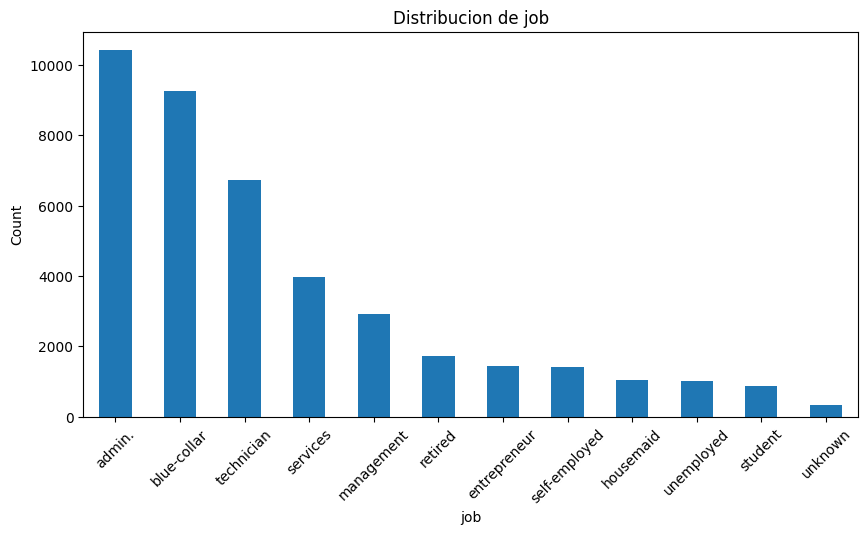

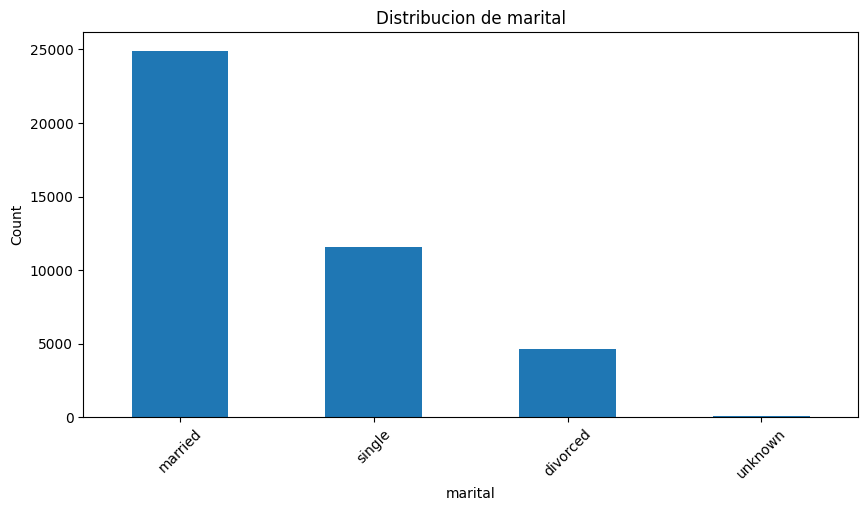

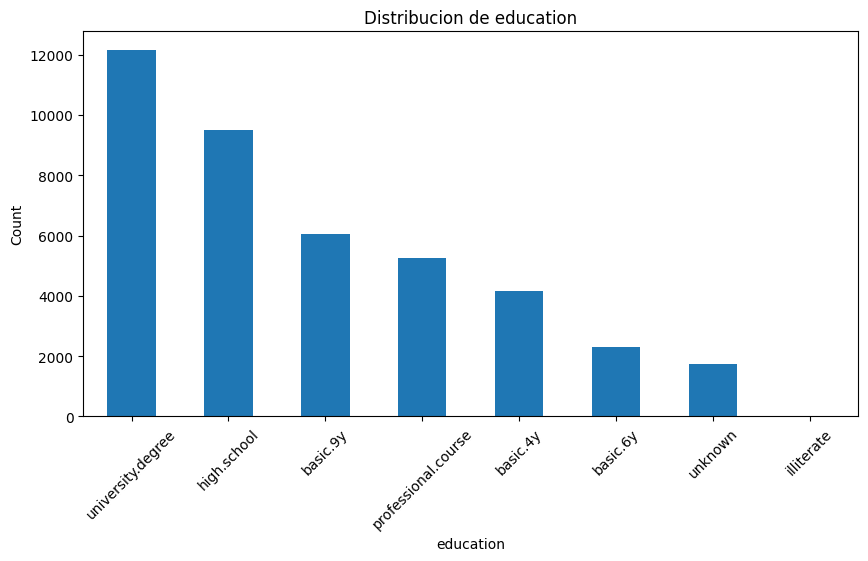

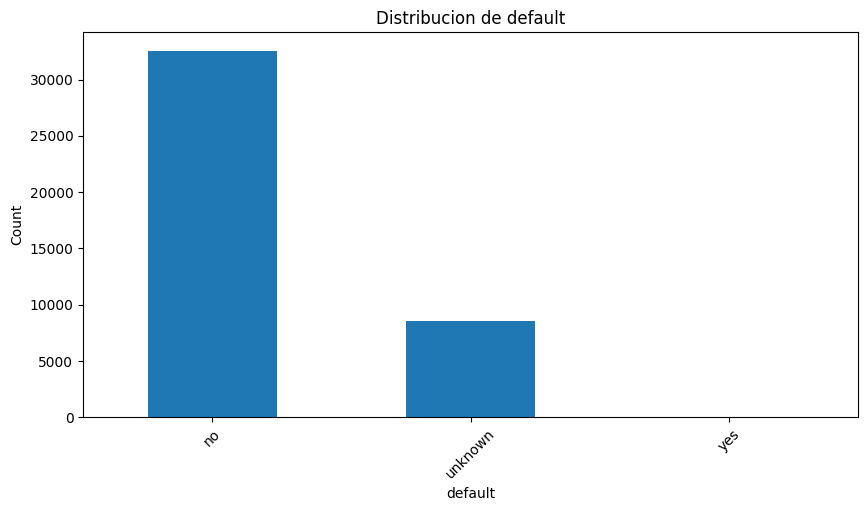

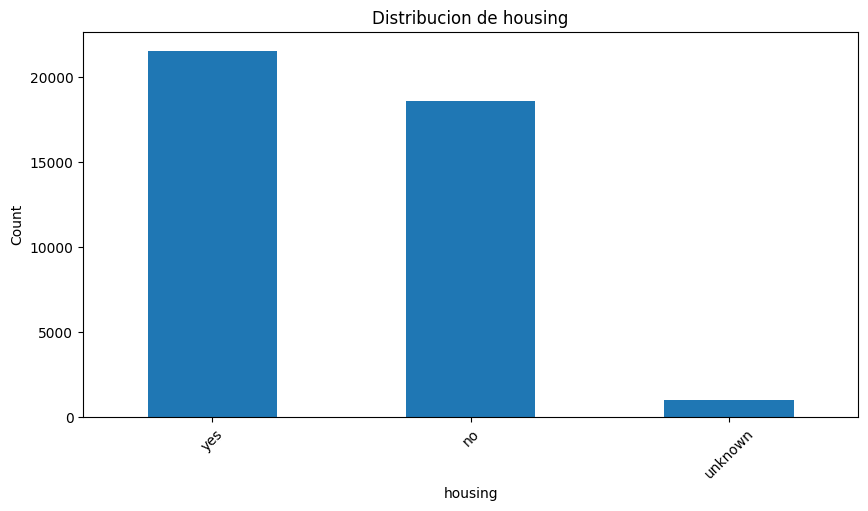

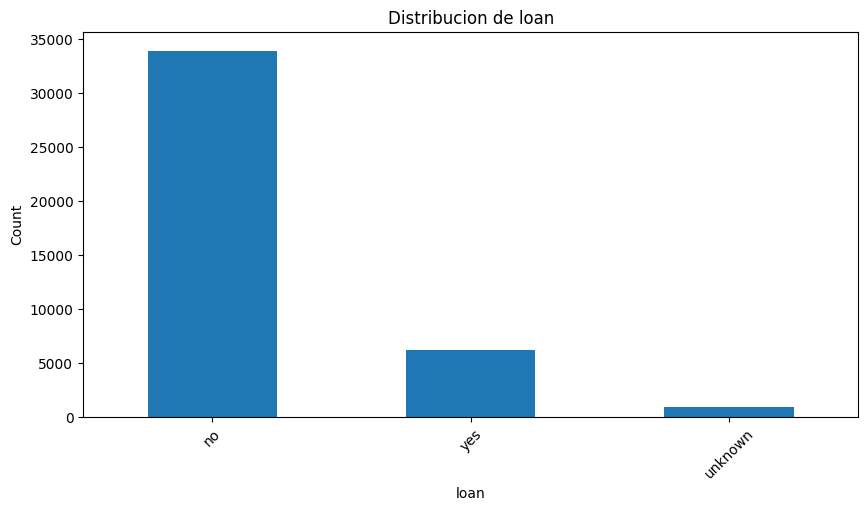

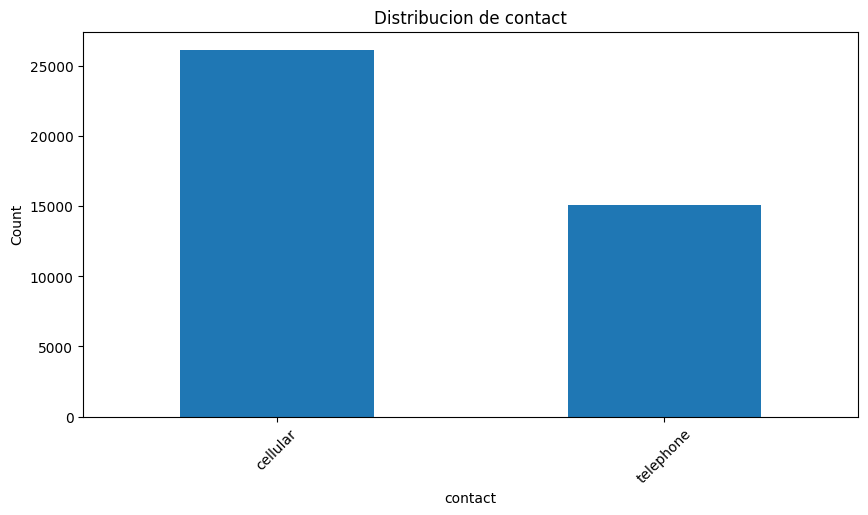

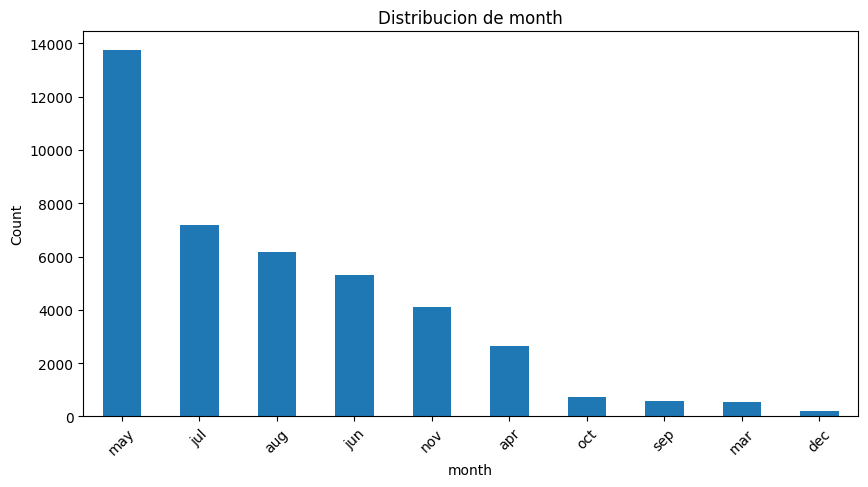

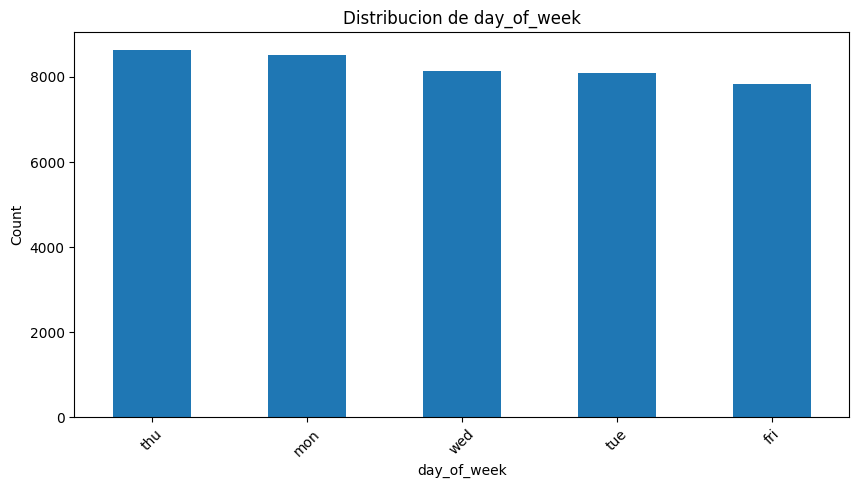

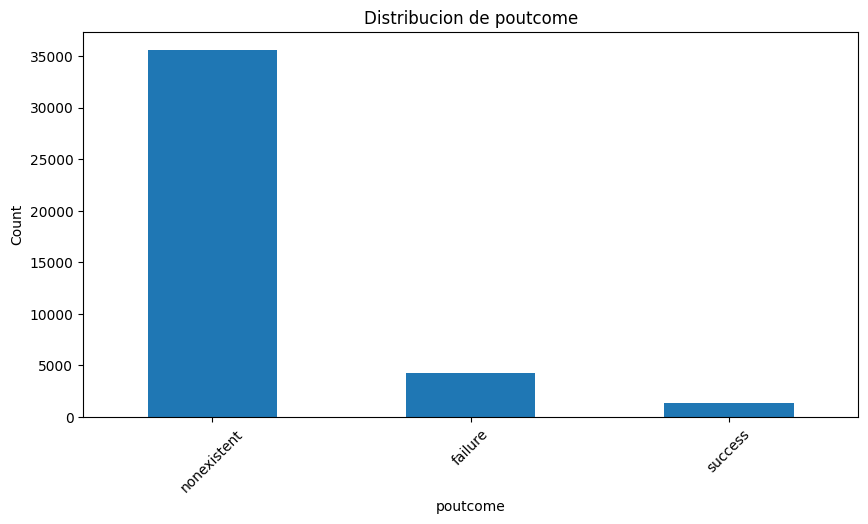

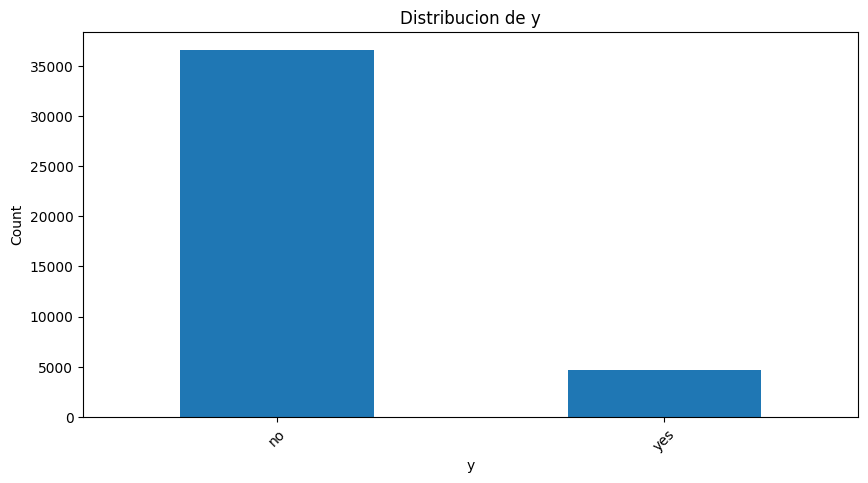

In [388]:
import matplotlib.pyplot as plt


for col in variables_categoricas:
    plt.figure(figsize=(10, 5))
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Distribucion de {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()



Vamos a convertir ya la variable y en numérica para poder trabajar con ella

1 = yes  
0 = no

In [389]:
# Convertir 'y' a numérico
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)


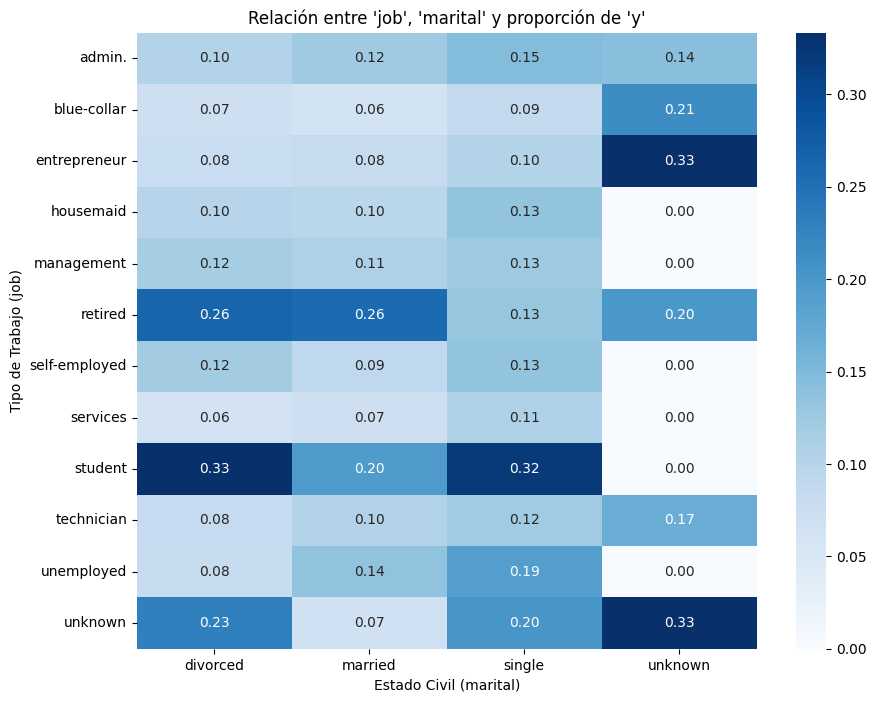

In [390]:
# Heatmap cruzando dos variables categóricas
heatmap_data = data.pivot_table(values='y', index='job', columns='marital', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues")
plt.title("Relación entre 'job', 'marital' y proporción de 'y'")
plt.xlabel("Estado Civil (marital)")
plt.ylabel("Tipo de Trabajo (job)")
plt.show()


In [391]:
# Columnas binarias
columnas_binarias = ['default', 'housing', 'loan']
for col in columnas_binarias:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# Columnas multiclase
one_hot_cols = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

# Verificar resultado
data.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,0.0,261,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
1,57,NaN,0.0,0.0,149,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
2,37,0.0,1.0,0.0,226,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
3,40,0.0,0.0,0.0,151,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
4,56,0.0,0.0,1.0,307,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False


VARIABLES NUMERICAS

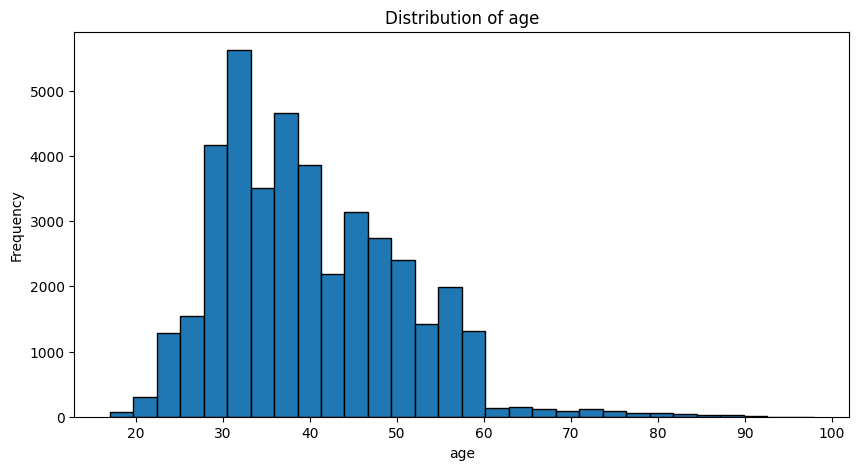

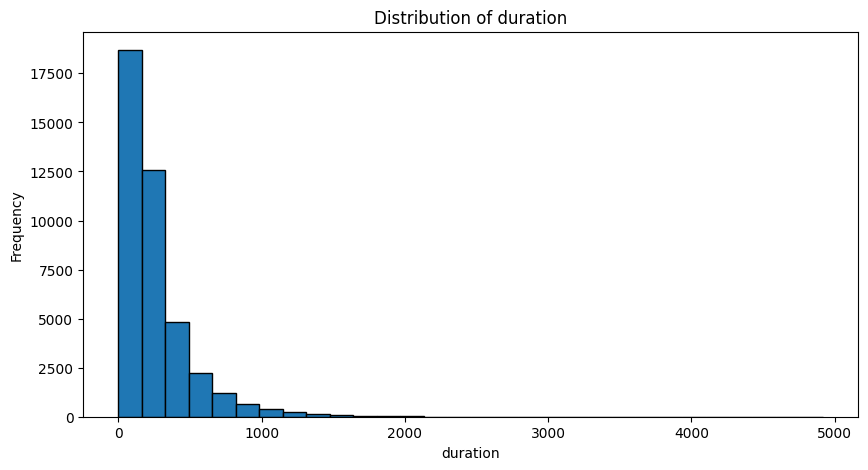

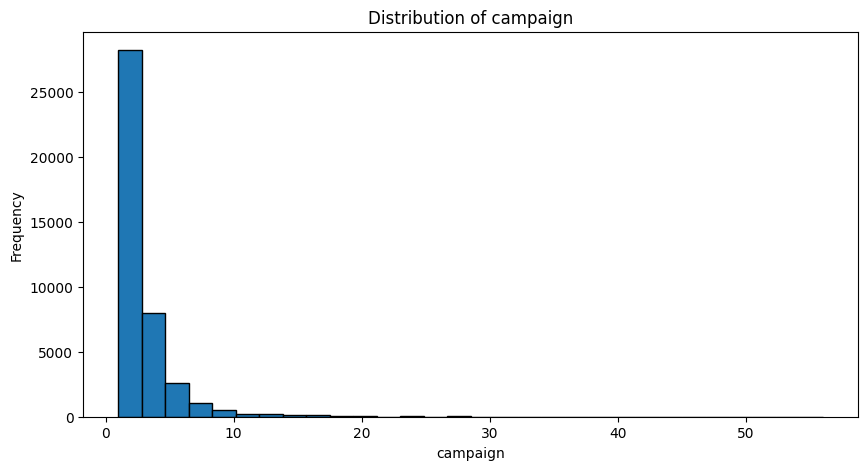

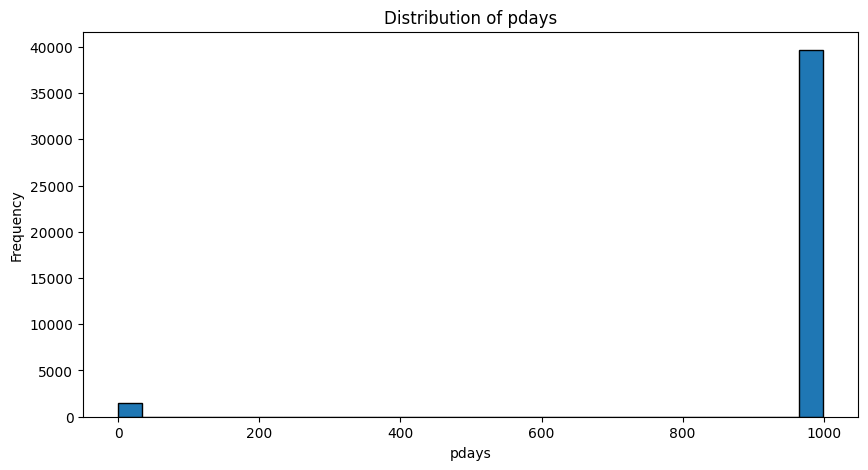

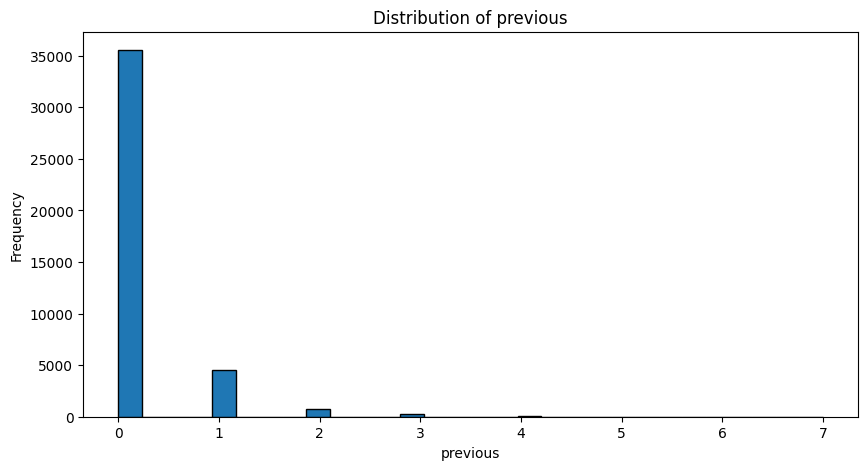

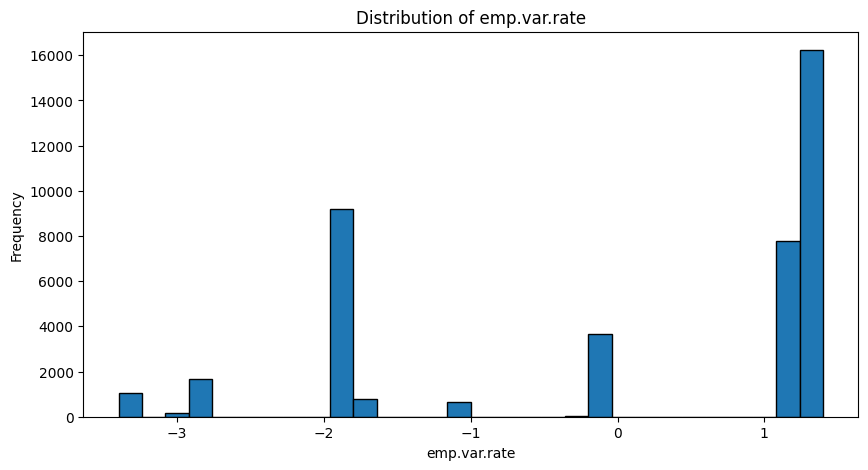

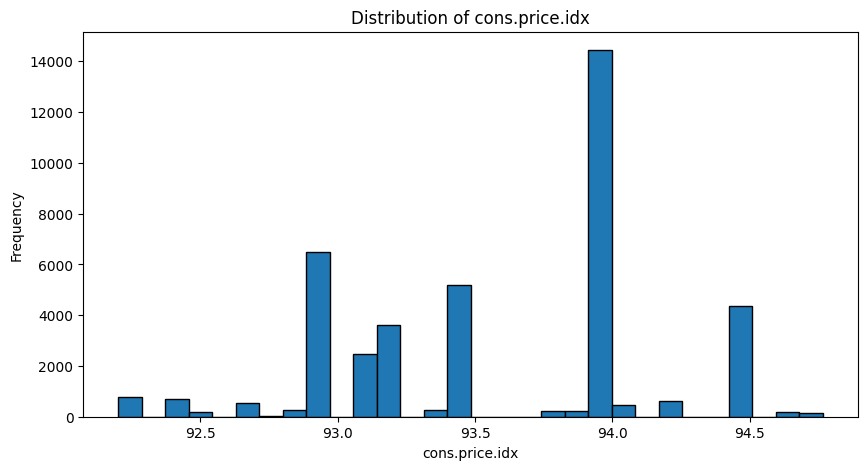

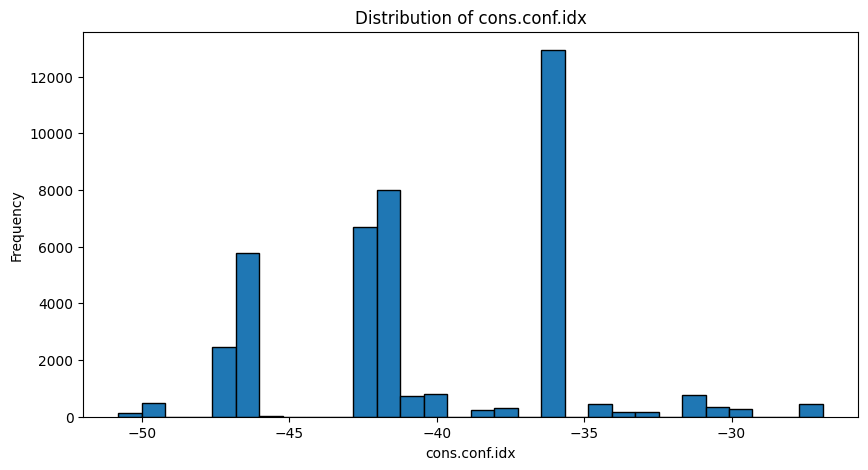

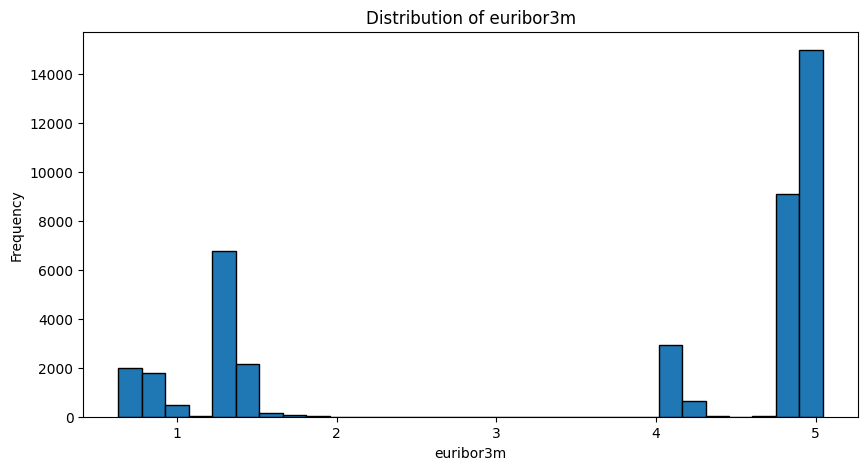

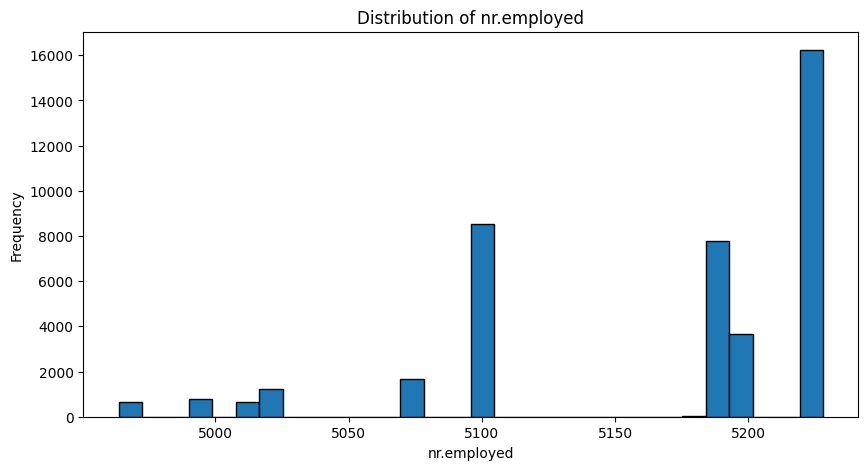

In [392]:
for col in variables_numericas:
    plt.figure(figsize=(10, 5))
    data[col].hist(bins=30, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(False)
    plt.show()

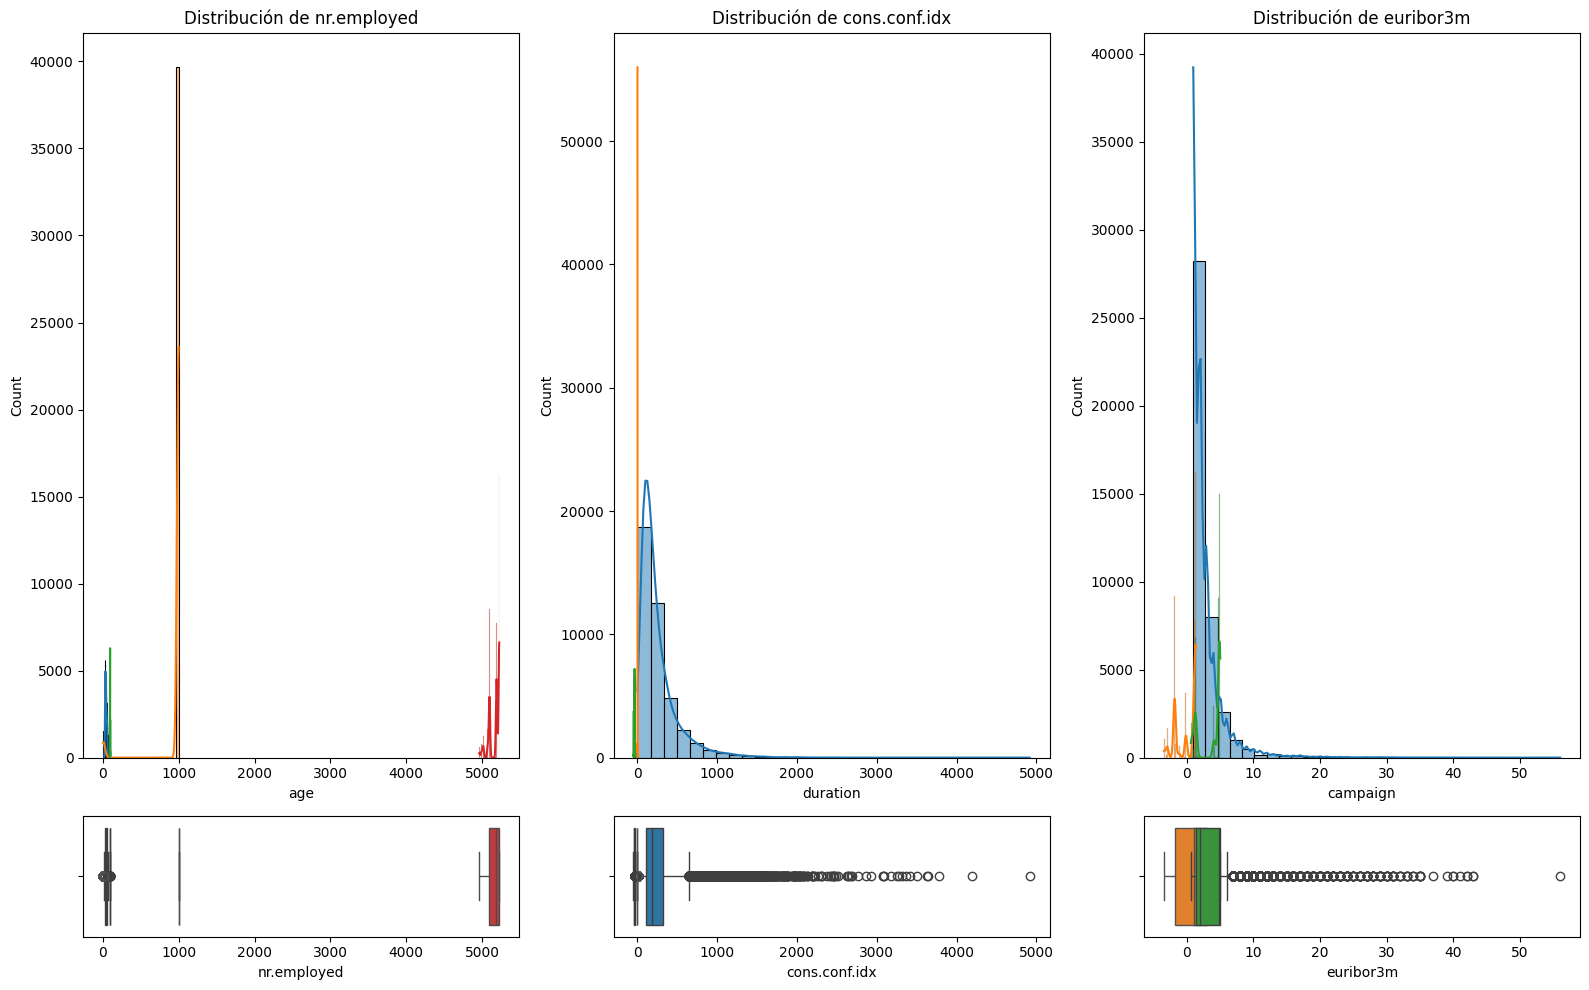

In [393]:
# Resumen estadístico general
#df_new.describe()


# Configuración de la cuadrícula: histogramas arriba y boxplots abajo
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), gridspec_kw={'height_ratios': [6, 1]})

# Iterar sobre las variables numéricas
for i, col in enumerate(variables_numericas):
    row = 0  # Fila para el histograma
    col_index = i % 3  # Columna en la cuadrícula
    sns.histplot(data=data, x=col, kde=True, bins=30, ax=axes[row, col_index])  # Histograma
    axes[row, col_index].set_title(f'Distribución de {col}')

    row = 1  # Fila para el boxplot
    sns.boxplot(data=data, x=col, ax=axes[row, col_index])  # Boxplot
    axes[row, col_index].set_xlabel(col)

# Ajustar diseño para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()





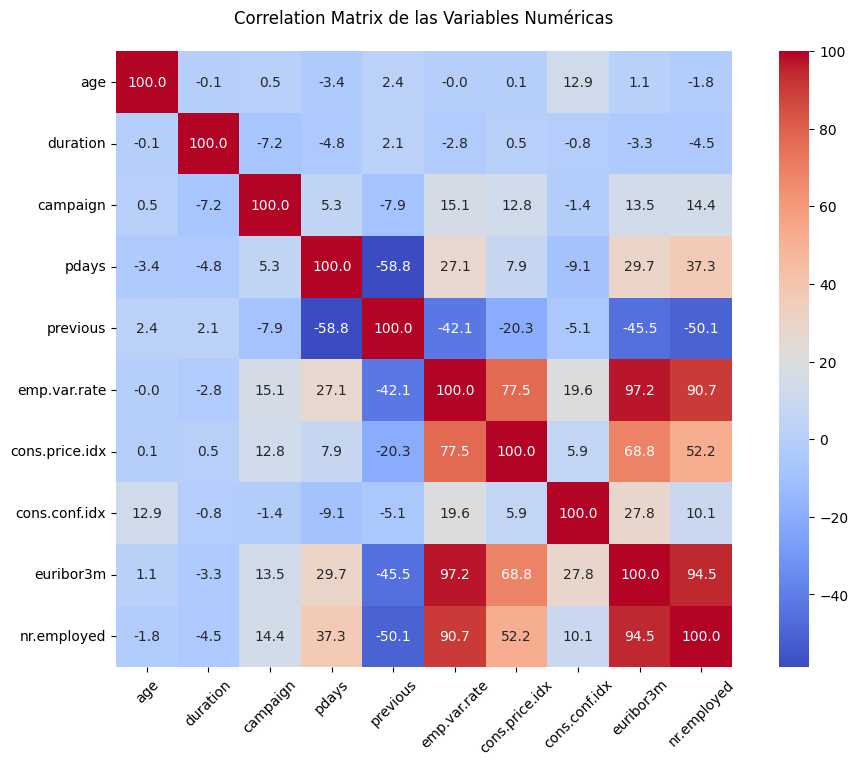

In [394]:
# Matriz de correlación para variables numéricas
correlation_matrix_vn = data[variables_numericas].corr() * 100  # Convertir a porcentaje

# Graficar la matriz de correlación como heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix_vn,  # Usar la matriz ya convertida
    annot=True,  # Mostrar los valores en el gráfico
    fmt=".1f",  # Mostrar un decimal (ya está en porcentaje)
    cmap='coolwarm', 
    cbar=True,
    square=True
)
plt.title("Correlation Matrix de las Variables Numéricas", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


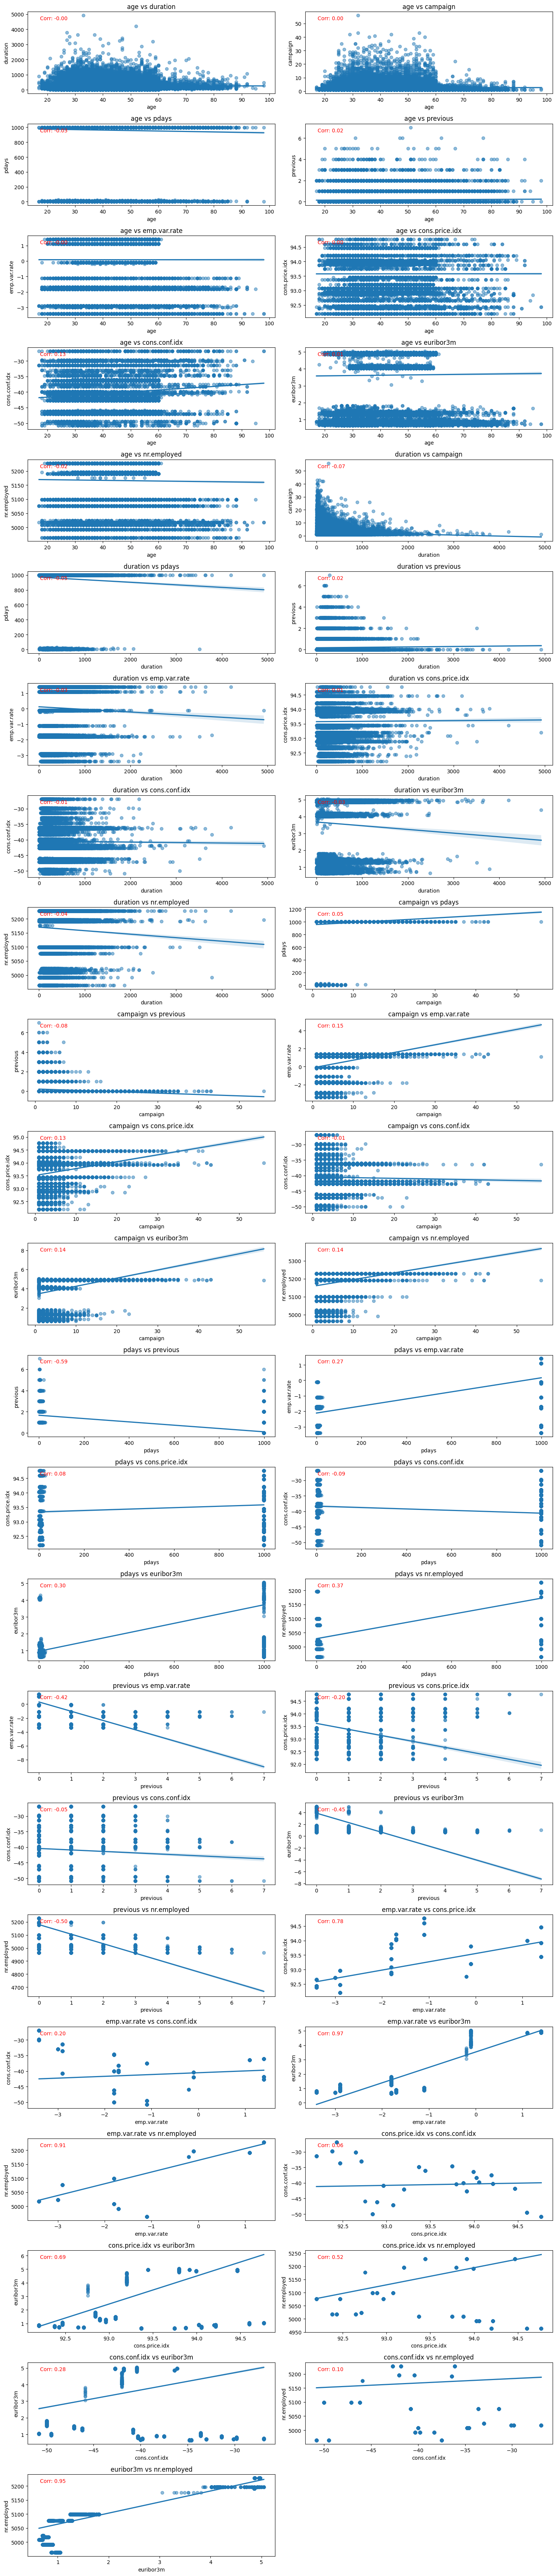

In [395]:
pairs = list(combinations(variables_numericas, 2))  # Generar todas las combinaciones de pares

# Determinar el tamaño dinámico de la cuadrícula
rows = len(pairs) // 2 + len(pairs) % 2
fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 3))

for idx, (col1, col2) in enumerate(pairs):
    row, col = divmod(idx, 2)  # Calcular posición de la cuadrícula
    sns.regplot(ax=axes[row, col], data=data, x=col1, y=col2, scatter_kws={'alpha': 0.5})
    axes[row, col].set_title(f'{col1} vs {col2}')
    corr = data[[col1, col2]].corr().iloc[0, 1]
    axes[row, col].annotate(f"Corr: {corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction',
                            fontsize=10, color='red', ha='left', va='top')

# Eliminar espacios vacíos si no se usan todas las subplots
if len(pairs) % 2 != 0:
    fig.delaxes(axes[-1, -1])  # Eliminar el último eje si no hay suficientes pares

plt.tight_layout()
plt.show()


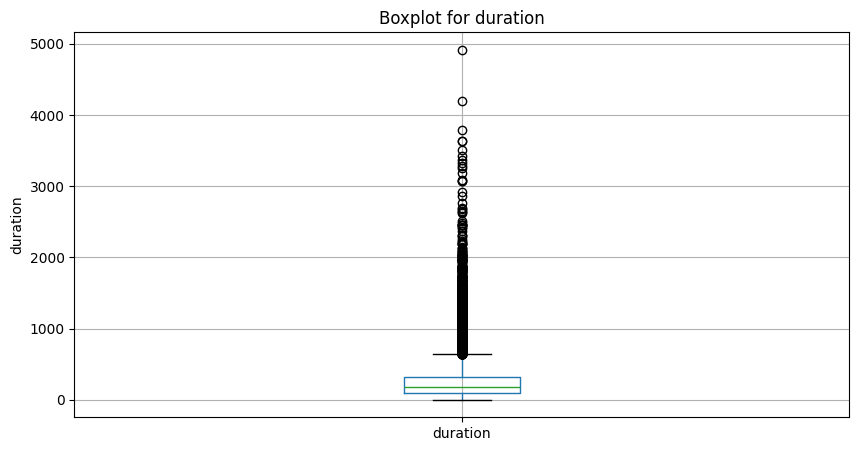

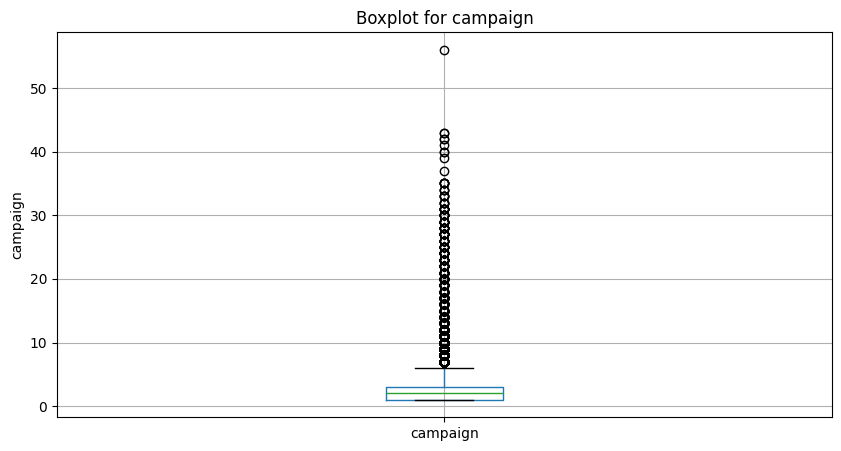

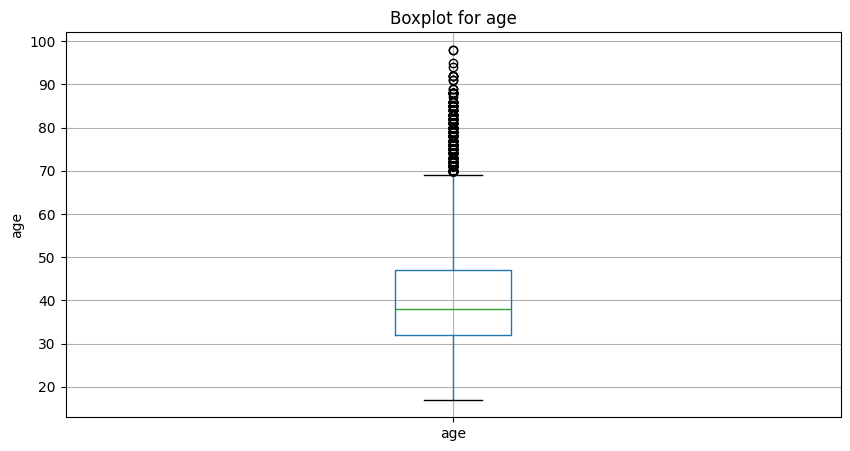

In [396]:
# Boxplots to detect outliers for selected numeric columns
columnas_outliers = ['duration', 'campaign', 'age']

for col in columnas_outliers:
    plt.figure(figsize=(10, 5))
    data.boxplot(column=col)
    plt.title(f"Boxplot for {col}")
    plt.ylabel(col)
    plt.show()


### 2. Comprobar la distribución de la variable objetivo (y).  

- value_counts(): Devuelve el número de registros para cada clase ( yes: 4640, no: 36548)

- value_counts(normalize=True): Devuelve los porcentajes de cada clase (por ejemplo, yes: 11.27%, no: 88.73%%). *A tener en cuenta técnicas como re-muestreo o ajustes en las métricas de evaluación.


In [397]:
# Ver distribución de la variable objetivo
print(data['y'].value_counts())

# Ver porcentaje de cada clase
print(data['y'].value_counts(normalize=True))


y
0    36537
1     4639
Name: count, dtype: int64
y
0    0.887337
1    0.112663
Name: proportion, dtype: float64


### 3. Codificar las variables caracteristicas (x) y las variables objetivo (y)

In [398]:
# Definir características y variable objetivo
features = data.drop(columns=["y"]).columns  # Todas menos "y"
target = "y"

# Separar características y etiqueta
X = data[features]
y = data[target]

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar los tamaños de los conjuntos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")



Tamaño de X_train: (32940, 50)
Tamaño de X_test: (8236, 50)
Tamaño de y_train: (32940,)
Tamaño de y_test: (8236,)


División para entrenamiento y prueba

- test_size=0.2:  El 20% de los datos se asigna al conjunto de prueba, y el 80% al conjunto de entrenamiento.  
- random_state=42:  Garantiza que la división sea reproducible. Si se vuelve a ejecutar el código, obtendrás la misma división.  
- stratify=y:  Asegura que la distribución de las clases (proporción de yes y no) sea la misma en los conjuntos de entrenamiento y prueba.

## 4. Sobreajuste (overfiting) vs subajuste (underfiting) <a name="overfiting"></a>

- Nulos

In [399]:
print(X_train.isnull().sum())

age                                 0
default                          6857
housing                           779
loan                              779
duration                            0
campaign                            0
pdays                               0
previous                            0
emp.var.rate                        0
cons.price.idx                      0
cons.conf.idx                       0
euribor3m                           0
nr.employed                         0
job_blue-collar                     0
job_entrepreneur                    0
job_housemaid                       0
job_management                      0
job_retired                         0
job_self-employed                   0
job_services                        0
job_student                         0
job_technician                      0
job_unemployed                      0
job_unknown                         0
marital_married                     0
marital_single                      0
marital_unkn

Arreglo de nulos:  
- Imputar default con una categoría adicional (-1): Es la mejor opción para preservar todos los datos y permitir que el modelo interprete los casos con valores faltantes.  
- Imputar housing y loan con la moda: Esto es seguro y no introduce un sesgo significativo debido al bajo porcentaje de valores nulos.  

In [400]:
# Imputar valores nulos para 'default' con una nueva categoría (-1)
X_train['default'] = X_train['default'].fillna(-1)
X_test['default'] = X_test['default'].fillna(-1)

# Imputar valores nulos para 'housing' y 'loan' con la moda
for col in ['housing', 'loan']:
    mode = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(mode)
    X_test[col] = X_test[col].fillna(mode)

# Verificar que ya no hay valores nulos
print(X_train.isnull().sum())
print(X_test.isnull().sum())


age                              0
default                          0
housing                          0
loan                             0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y  

a) Regularización:  


Qué es: La regularización penaliza los coeficientes grandes del modelo, ayudando a reducir su complejidad.   

Cómo usarlo en regresión logística: Se controlan con los parámetros:  
- penalty: Tipo de regularización. (l1 para Lasso, l2 para Ridge).
- C: Inverso de la fuerza de regularización. Valores más pequeños implican mayor regularización.

In [401]:
# Modelo con regularización L2 (Ridge)
model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

/workspaces/machine-learning-python-templat/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)